In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Credit_card.csv")
data.head()

,Time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data["Class"].unique()

array([0, 1], dtype=int64)

In [4]:
data.dtypes

Time        int64
v1        float64
v2        float64
v3        float64
v4        float64
v5        float64
v6        float64
v7        float64
v8        float64
v9        float64
v10       float64
v11       float64
v12       float64
v13       float64
v14       float64
v15       float64
v16       float64
v17       float64
v18       float64
v19       float64
v20       float64
v21       float64
v22       float64
v23       float64
v24       float64
v25       float64
v26       float64
v27       float64
v28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 31 columns):
Time      663 non-null int64
v1        663 non-null float64
v2        663 non-null float64
v3        663 non-null float64
v4        663 non-null float64
v5        663 non-null float64
v6        663 non-null float64
v7        663 non-null float64
v8        663 non-null float64
v9        663 non-null float64
v10       663 non-null float64
v11       663 non-null float64
v12       663 non-null float64
v13       663 non-null float64
v14       663 non-null float64
v15       663 non-null float64
v16       663 non-null float64
v17       663 non-null float64
v18       663 non-null float64
v19       663 non-null float64
v20       663 non-null float64
v21       663 non-null float64
v22       663 non-null float64
v23       663 non-null float64
v24       663 non-null float64
v25       663 non-null float64
v26       663 non-null float64
v27       663 non-null float64
v28       663 non-null float6

In [6]:
data.describe()


,Time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,Amount,Class
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,...,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,240.723982,-0.173477,0.202923,0.868027,0.313785,0.004962,0.191067,0.120179,-0.057877,-0.021444,...,0.011559,-0.101324,-0.039138,-0.001128,0.118359,0.023800,0.026277,-0.015521,70.339698,0.039216
std,147.066052,1.318746,1.195083,1.017452,1.268028,1.131101,1.248768,0.860575,0.828433,0.897497,...,0.611034,0.609244,0.369201,0.628296,0.426569,0.468524,0.308202,0.291046,206.447777,0.194254
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,105.000000,-0.901810,-0.174201,0.312139,-0.436332,-0.552683,-0.613937,-0.324460,-0.157950,-0.517152,...,-0.219877,-0.528465,-0.172574,-0.384946,-0.160158,-0.313228,-0.045075,-0.015932,5.980000,0.000000
50%,241.000000,-0.376162,0.277666,0.897601,0.448154,-0.107492,-0.068701,0.117003,0.044961,-0.074016,...,-0.070069,-0.069830,-0.045366,0.091900,0.145526,-0.015710,0.023011,0.022966,17.240000,0.000000
75%,366.000000,1.108861,0.877669,1.509547,1.140908,0.466815,0.490715,0.567376,0.262158,0.415102,...,0.102520,0.311334,0.073547,0.429625,0.439774,0.263885,0.115571,0.087914,57.750000,0.000000
max,499.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.459274,...,5.273420,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


In [7]:
data.shape

(663, 31)

In [8]:
data.isnull().sum()

Time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
Amount    0
Class     0
dtype: int64

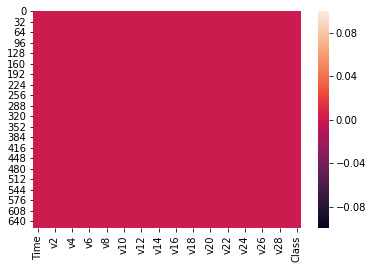

In [9]:
sns.heatmap(data.isnull())

In [10]:
x=data.drop("Class",axis=1)
x.head()

,Time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [11]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [12]:
y=data["Class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [13]:
print(x.shape)
print(y.shape)

(663, 30)
(663,)


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=11)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(523, 30)
(140, 30)
(523,)
(140,)


In [16]:
lm=LogisticRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9642857142857143
[[135   0]
 [  5   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       135
           1       0.00      0.00      0.00         5

    accuracy                           0.96       140
   macro avg       0.48      0.50      0.49       140
weighted avg       0.93      0.96      0.95       140



In [17]:
#ROC CURVE
from sklearn.metrics import roc_curve

In [18]:
y_pred_prob=lm.predict_proba(x_test)[:,1]
y_pred_prob

array([0.13618636, 0.03794125, 0.04034642, 0.01919225, 0.02188401,
       0.02102129, 0.05357307, 0.02591986, 0.01029305, 0.0564586 ,
       0.03616023, 0.02833221, 0.00386061, 0.03272606, 0.01153796,
       0.01028788, 0.01223499, 0.05228977, 0.01613023, 0.02530714,
       0.00344795, 0.05370323, 0.00239279, 0.02322521, 0.0161169 ,
       0.02154492, 0.13258075, 0.05156021, 0.01619848, 0.02949043,
       0.00375848, 0.02028102, 0.01664706, 0.00961194, 0.01589678,
       0.06958157, 0.03311177, 0.0161644 , 0.21026232, 0.04480068,
       0.02349987, 0.05851454, 0.06604106, 0.01260687, 0.02428256,
       0.00778371, 0.02493133, 0.00892025, 0.06771753, 0.01483841,
       0.0650133 , 0.32595206, 0.01184752, 0.009427  , 0.04026692,
       0.0086741 , 0.01596883, 0.0140799 , 0.03631532, 0.07305531,
       0.01686186, 0.04783105, 0.02758733, 0.00631302, 0.015445  ,
       0.08191794, 0.07490331, 0.03809255, 0.05244828, 0.01853101,
       0.02235473, 0.02481493, 0.0078931 , 0.00629994, 0.02838

In [19]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [20]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.00740741 0.02962963 0.02962963 0.08888889 0.08888889
 0.21481481 0.21481481 0.38518519 0.38518519 0.54814815 0.54814815
 1.        ]
[0.  0.  0.  0.2 0.2 0.4 0.4 0.6 0.6 0.8 0.8 1.  1. ]
[1.32595206e+00 3.25952057e-01 2.10262318e-01 1.69058755e-01
 8.14076855e-02 7.57683633e-02 5.64585962e-02 5.48926360e-02
 3.57916214e-02 3.42463824e-02 2.18840100e-02 2.15449184e-02
 7.48814549e-04]


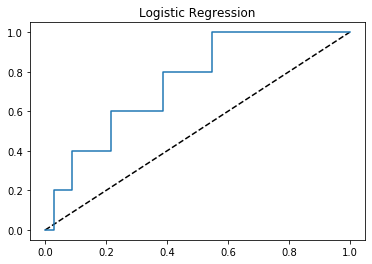

In [21]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="LogisticRegression")
plt.title("Logistic Regression")
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score

In [23]:
auc_score=roc_auc_score(y_test,lm.predict(x_test))
print(auc_score)

0.5


In [24]:
#Applying Bagging Methods
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfr=RandomForestClassifier(n_estimators=300,random_state=42)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

1.0

In [26]:
#Apllying Boosting method
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
gbr=GradientBoostingClassifier()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

1.0

In [28]:
#Using xgboost 
import xgboost as xgb
from sklearn. metrics import mean_squared_error
import numpy as np

In [29]:
x,y=data.drop("Class",axis=1),data["Class"]

In [30]:
data.dmatrix=xgb.DMatrix(data=x,label=y)

In [31]:
xg_reg=xgb.XGBRegressor()
xg_reg.fit(x_train,y_train)
xg_reg.score(x_train,y_train)

[04:56:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.905784676286645

In [32]:
#Comparison between Models

In [33]:
print(accuracy_score(y_test,pred))
print(auc_score)
print(rfr.score(x_train,y_train))
print(gbr.score(x_train,y_train))
print(xg_reg.score(x_train,y_train))

0.9642857142857143
0.5
1.0
1.0
0.905784676286645


In [34]:
from sklearn.externals import joblib
joblib.dump(rfr,"credit_card_fraud")
rfr_from_joblib=joblib.load("credit_card_fraud")
rfr_from_joblib.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)